<a href="https://colab.research.google.com/github/aynaval/nyc-taxi-trip-duration-predicton/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 36)
plt.style.use('seaborn')

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15
plt.rcParams['figure.figsize'] = [16, 10]
from geopy.distance import great_circle



In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
data = pd.read_csv('/content/drive/MyDrive/NYC Taxi Trip Time Prediction - Lavanya M/Copy of NYC Taxi Data.csv')

# **EDA**

In [118]:
# !pip install pandas-profiling==2.7.1
# from pandas_profiling import ProfileReport
# prof = ProfileReport(data)
# prof.to_file(output_file='output.html')

In [119]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [120]:
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [121]:
data.sample(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1158022,id1704939,2,2016-04-05 20:05:17,2016-04-05 20:17:40,1,-73.974983,40.755669,-73.988167,40.732010,N,743
628593,id2605991,1,2016-03-18 12:46:48,2016-03-18 13:02:11,1,-73.962364,40.779430,-73.959846,40.807941,N,923
256049,id1748581,2,2016-03-26 12:13:24,2016-03-26 12:18:27,2,-73.984352,40.748741,-73.997162,40.731491,N,303


In [122]:
data.shape

(1458644, 11)

In [123]:
data.size

16045084

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [125]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


* Minimum value of trip duration is 1 secound and max is 3526282 (approx 40 days).


In [126]:
data.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [127]:
#sns.heatmap(data.isnull());

* There are no missing values in the data.

In [128]:
data.duplicated().value_counts()

False    1458644
dtype: int64

* There are no duplicate values.

## **Distribution**

### Categorical columns

In [129]:
#sns.countplot(data=data,x='vendor_id');


* There is almost equal ratio of both vendors.

In [130]:
#sns.countplot(data=data,x='store_and_fwd_flag');


* Only few records were recored in memory before sharing(Y).

### Numerical columns

In [131]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

In [132]:
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [133]:
print(data['pickup_datetime'].dt.year.unique(),data['dropoff_datetime'].dt.year.unique())

[2016] [2016]


In [134]:
(data['pickup_datetime'].dt.month.unique(),data['dropoff_datetime'].dt.month.unique())

(array([3, 6, 1, 4, 5, 2]), array([3, 6, 1, 4, 5, 2, 7]))

In [135]:
(data[data['dropoff_datetime'].dt.month==7]['trip_duration']//60).value_counts(sort=True)

11    7
9     6
18    6
7     5
12    5
     ..
44    1
43    1
39    1
36    1
4     1
Name: trip_duration, Length: 63, dtype: int64

In [136]:
(data[data['dropoff_datetime'].dt.month==7]['trip_duration']//3600).value_counts()

0     109
23     12
1       6
Name: trip_duration, dtype: int64

In [137]:
((data['dropoff_datetime']-data['pickup_datetime']).dt.total_seconds().astype(int) == data['trip_duration']).value_counts() 

True    1458644
dtype: int64

* Drop off column can be dropped as (drop off - pick up) = trip duration.

In [138]:
data.drop('dropoff_datetime',axis =1,inplace= True)

In [139]:
# n =1;
# for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
#   plt.subplot(2,2,n)
#   sns.boxplot(data[i])
#   n+=1

* city_long_border = (-74.03, -73.75)
* city_lat_border = (40.63, 40.85)



In [140]:
# dropping outliers
data = data[data['pickup_longitude'] <= -73.75]
data = data[data['pickup_longitude'] >= -74.03]
data = data[data['pickup_latitude'] <= 40.85]
data = data[data['pickup_latitude'] >= 40.63]
data = data[data['dropoff_longitude'] <= -73.75]
data = data[data['dropoff_longitude'] >= -74.03]
data = data[data['dropoff_latitude'] <= 40.85]
data = data[data['dropoff_latitude'] >= 40.63]

In [141]:
# sns.boxplot(data['trip_duration']);

In [142]:
data['trip_duration'].describe()

count    1.439183e+06
mean     9.462307e+02
std      5.251643e+03
min      1.000000e+00
25%      3.940000e+02
50%      6.560000e+02
75%      1.059000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

* Min values is 1 and max is 352682.
* Using 2 standared deviation after taking log of trip duration.

In [143]:
# sns.histplot(data['trip_duration'],bins = 100)
# plt.title('skew :'+str(data['trip_duration'].skew()))
# plt.ticklabel_format(style='plain')


In [144]:
# sns.histplot(np.log(data['trip_duration']),bins=100);
# plt.title('skew :'+str(np.log(data['trip_duration']).skew()));

In [145]:
data['log_trip_duration']= np.log10(data['trip_duration'])

In [146]:
data.shape

(1439183, 11)

In [147]:
data['log_trip_duration'].mean()- 3*data['log_trip_duration'].std()

1.7716915704097043

In [148]:
data = data[data['log_trip_duration']>(data['log_trip_duration'].mean()- 3*data['log_trip_duration'].std())]
data = data[data['log_trip_duration']<(data['log_trip_duration'].mean()+ 3*data['log_trip_duration'].std())]


In [149]:
data['month'] = data['pickup_datetime'].dt.month_name()

In [150]:
data['day_no'] = data['pickup_datetime'].dt.day

In [151]:
data['day'] = data['pickup_datetime'].dt.day_name()

In [152]:
# sns.barplot(data=data,x='month',y='trip_duration')

* All months have equal distribution.

In [153]:
# sns.barplot(data=data,x='day_no',y='trip_duration' )

* There are equal number of all days.

In [154]:
# sns.barplot(data=data,x='day',y='trip_duration')

In [155]:
data['hour'] = data['pickup_datetime'].dt.hour

In [156]:
data['minute'] = data['pickup_datetime'].dt.minute

In [157]:
data['second'] = data['pickup_datetime'].dt.second

In [158]:
# sns.boxplot(data=data,x='day',y='trip_duration')

In [159]:
# sns.boxplot(data=data,x='month',y='trip_duration',hue='day')

In [160]:
# sns.boxplot(data=data,x='day_no',y='trip_duration')

In [161]:
# sns.barplot(data=data,x='hour',y='trip_duration',hue='month')

In [162]:
# sns.barplot(data=data,x='hour',y='trip_duration',hue='day')

In [163]:
# sns.barplot(data=data,x='passenger_count',y='trip_duration',hue='day')

In [164]:
 data = data[data['passenger_count']>0]

In [165]:
def distancer(row):
    coords_1 = (row['pickup_latitude'], row['pickup_longitude'])
    coords_2 = (row['dropoff_latitude'], row['dropoff_longitude'])
    return great_circle(coords_1, coords_2).km

data['pickup_dropoff_distance'] = data.apply(distancer, axis=1)

In [166]:
# sns.lineplot(data=data,y='pickup_dropoff_distance',x='hour')

In [167]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].map(dict(N=0,Y=1))

In [168]:
data = pd.get_dummies(data ,columns= ['month','day'],drop_first=True)

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428683 entries, 0 to 1458643
Data columns (total 27 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   id                       1428683 non-null  object        
 1   vendor_id                1428683 non-null  int64         
 2   pickup_datetime          1428683 non-null  datetime64[ns]
 3   passenger_count          1428683 non-null  int64         
 4   pickup_longitude         1428683 non-null  float64       
 5   pickup_latitude          1428683 non-null  float64       
 6   dropoff_longitude        1428683 non-null  float64       
 7   dropoff_latitude         1428683 non-null  float64       
 8   store_and_fwd_flag       1428683 non-null  int64         
 9   trip_duration            1428683 non-null  int64         
 10  log_trip_duration        1428683 non-null  float64       
 11  day_no                   1428683 non-null  int64         
 12  

In [170]:
data.drop(['id','pickup_datetime','trip_duration'],axis=1,inplace=True)

In [171]:
# sns.heatmap(data.corr(),annot=True)

In [172]:
# ! pip install sweetviz

In [173]:
# import sweetviz as sv
# #You could specify which variable in your dataset is the target for your model creation. We can specify it using the target_feat parameter.
# my_report = sv.analyze(data, target_feat ='log_trip_duration')
# my_report.show_html()

untuned
MAE	MSE	RMSE	R2	RMSLE	MAPE
0.2594	0.1220	0.3493	0.7666	0.0491	0.0416

tuned
MAE	MSE	RMSE	R2	RMSLE	MAPE
0.2438	0.1100	0.3316	0.7898	0.0467	0.0391

In [174]:
from sklearn.preprocessing import MinMaxScaler

In [175]:
scaler = MinMaxScaler()

In [176]:
data[['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','day_no']]= scaler.fit_transform(data[['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','day_no']])

In [177]:
X = data.drop('log_trip_duration',axis = 1)

In [178]:
y = data.loc[:,'log_trip_duration']

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [181]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1142946, 23), (285737, 23), (1142946,), (285737,))

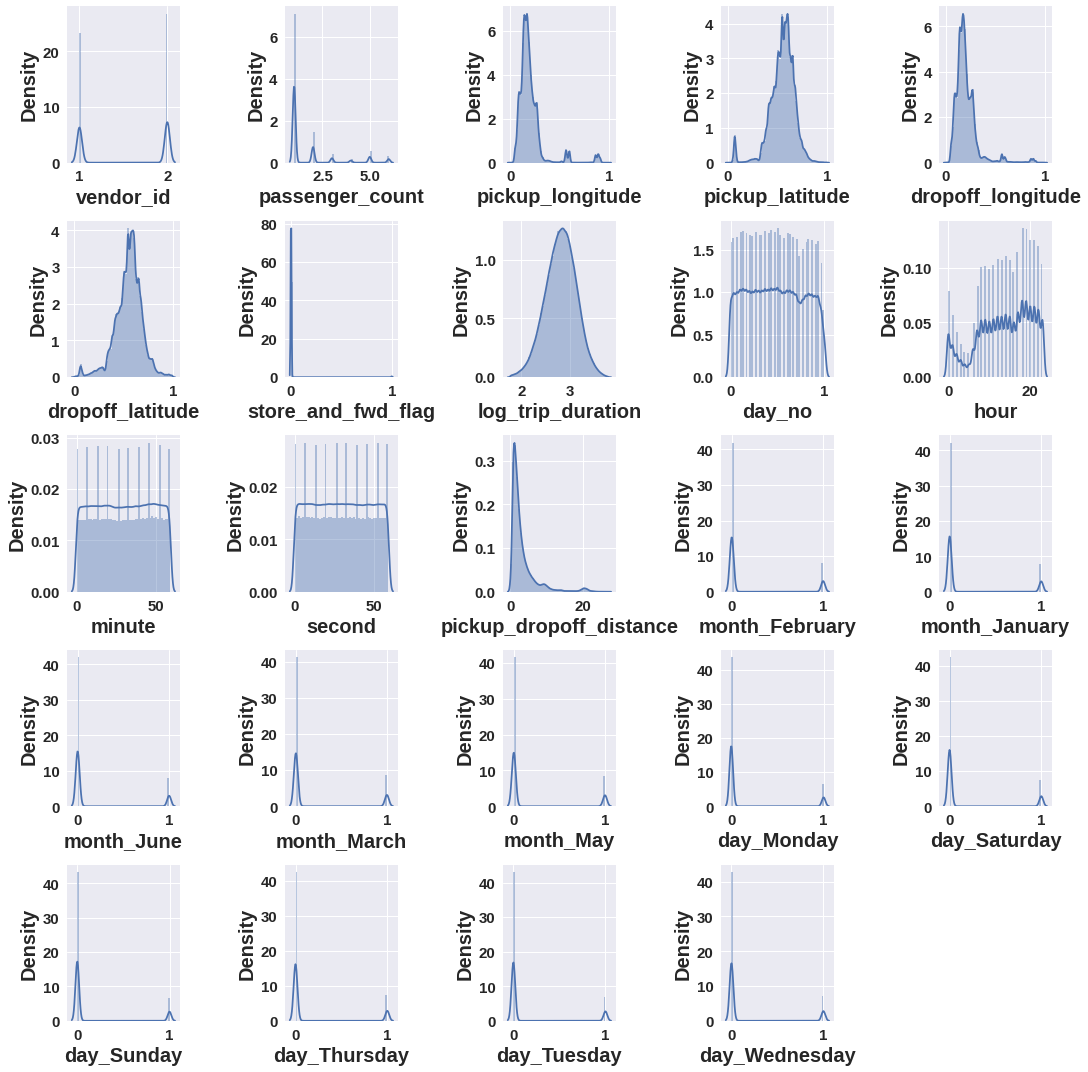

In [182]:
n=1
plt.figure(figsize=(15,15))
for i in data.columns:
  plt.subplot(5,5,n)
  sns.distplot(data[i])
  n=n+1
plt.tight_layout()


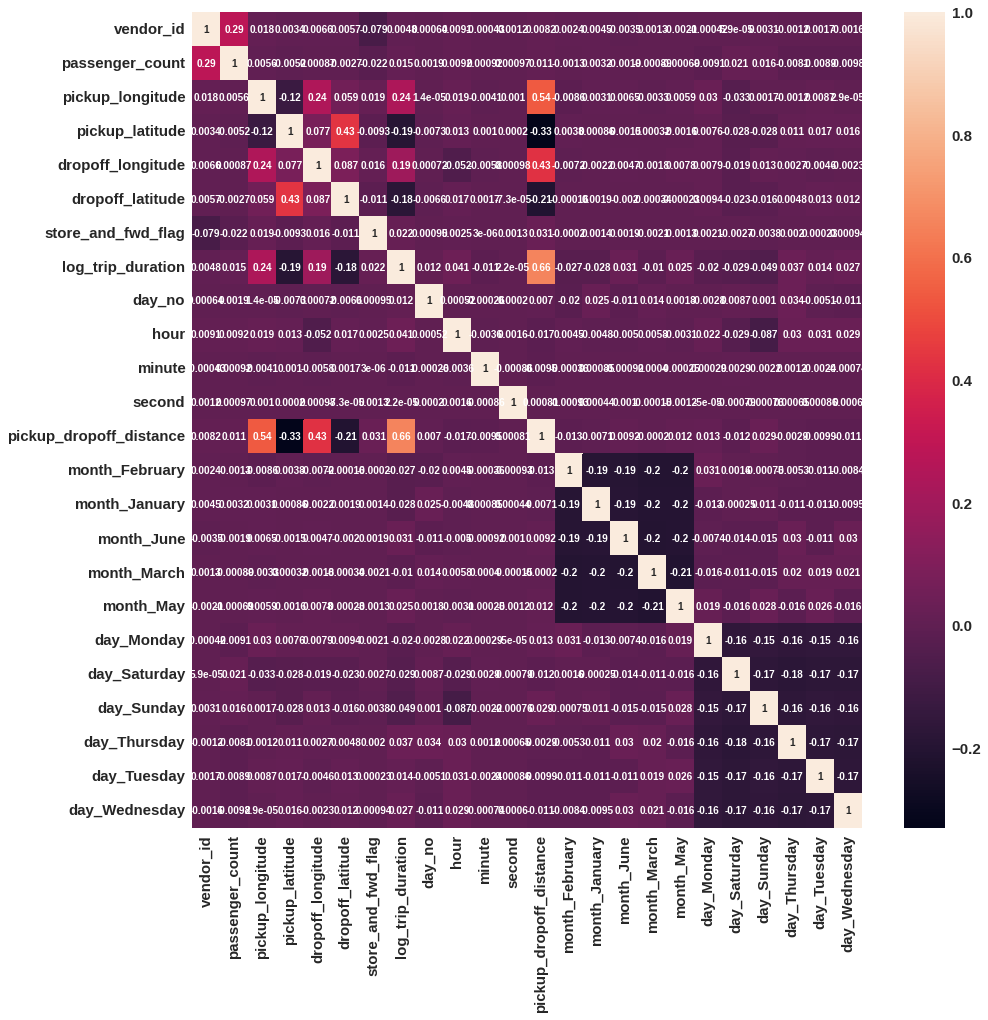

In [183]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

# **Linear regression**

In [184]:
from sklearn.linear_model import LinearRegression

In [185]:
lr = LinearRegression()

In [186]:
lr.fit(X_train,y_train)

LinearRegression()

In [187]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [188]:
lr.coef_

array([-2.34476570e-04,  1.98469698e-03, -3.91841867e-01,  1.83088385e-01,
       -3.22024902e-01, -5.09011300e-02,  5.50070358e-03,  7.93830739e-03,
        2.18391484e-03, -8.39199398e-05, -1.34872016e-06,  7.07305833e-02,
       -1.90854177e-02, -2.28175324e-02,  9.44542562e-03, -1.64401233e-02,
        7.39196599e-03, -3.93325966e-02, -3.52498245e-02, -7.00126241e-02,
        1.04473583e-02, -9.74450007e-04,  7.69049302e-03])

In [189]:
y_pred_train_lr= lr.predict(X_train)

In [190]:
y_pred_test_lr = lr.predict(X_test)

In [191]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [192]:
# for train data
lr_train_mse  = mean_squared_error((y_train), (y_pred_train_lr))
print("Train MSE :" , lr_train_mse)

lr_train_rmse = np.sqrt(lr_train_mse)

print("Train RMSE :" ,lr_train_rmse)

lr_train_r2 = r2_score((y_train), (y_pred_train_lr))
print("Train R2 :" ,lr_train_r2) 

lr_train_r2_ = 1-(1-r2_score((y_train), (y_pred_train_lr)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",lr_train_r2_)

Train MSE : 0.05107120243890582
Train RMSE : 0.2259893856775265
Train R2 : 0.48323325094637404
Train Adjusted R2 :  0.4832228516057119


In [193]:
lr_test_mse  = mean_squared_error((y_test), (y_pred_test_lr))
print("Test MSE :" , lr_test_mse)

lr_test_rmse = np.sqrt(lr_test_mse)

print("Test RMSE :" ,lr_test_rmse)

lr_test_r2 = r2_score((y_test), (y_pred_test_lr))
print("Test R2 :" ,lr_test_r2)

lr_test_r2_ = 1-(1-r2_score((y_test), (y_pred_test_lr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ",lr_test_r2_)

Test MSE : 0.05087670291136038
Test RMSE : 0.22555864627932218
Test R2 : 0.48200153199598206
Test Adjusted R2 :  0.4819598329316619


In [194]:
y_train.shape,y_pred_train_lr.shape

((1142946,), (1142946,))

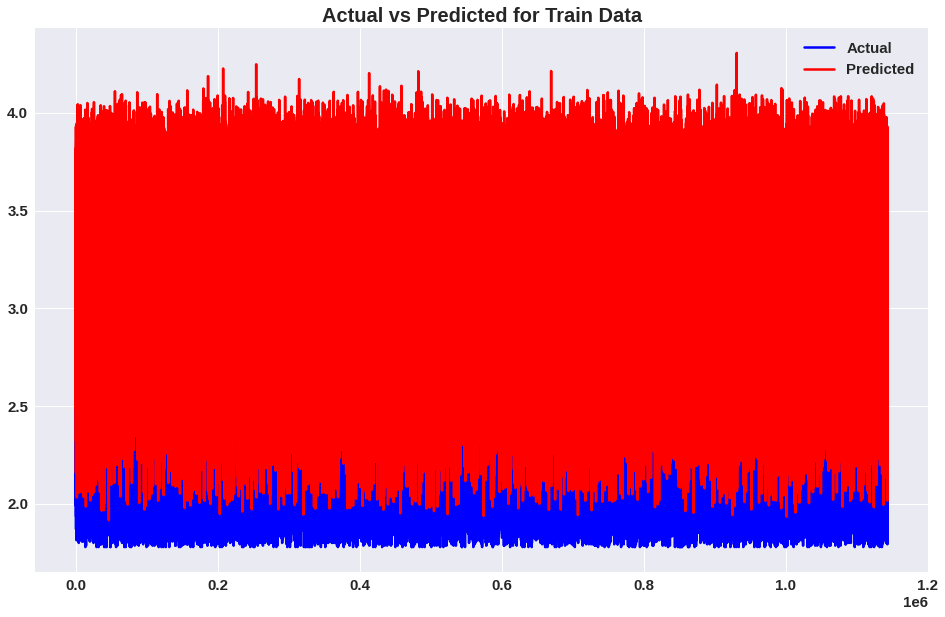

In [195]:
c= [i for i in range(0, len(y_train))]
plt.plot(c, y_train, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_train_lr, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Train Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

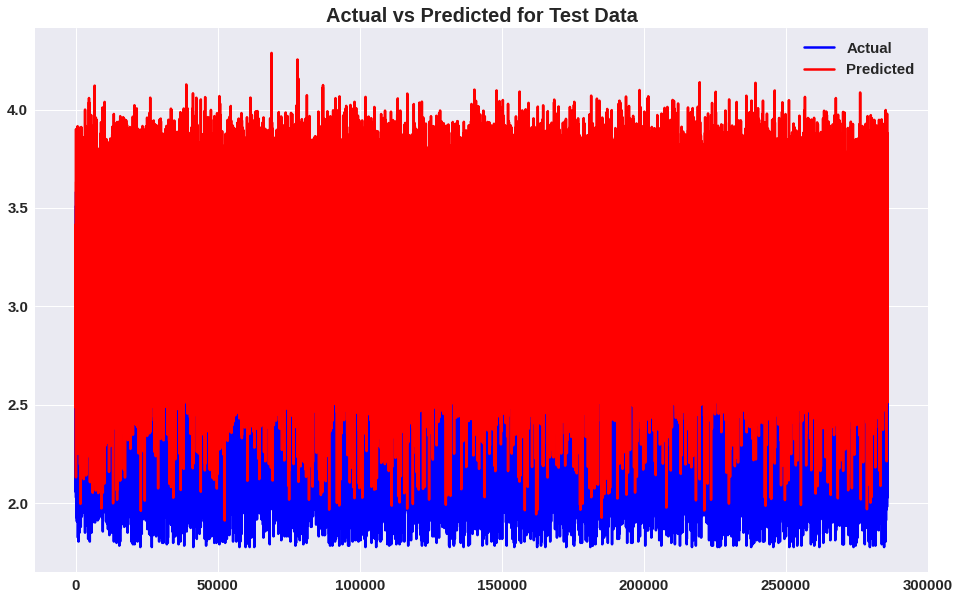

In [196]:
#Actual vs Prediction

c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_test_lr, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

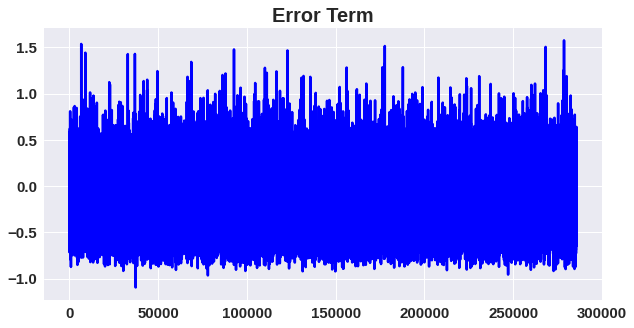

In [197]:
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_test_lr, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

# **Lasso Regression**

In [198]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [199]:
#Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [200]:
print('The best fit alpha value is found out to be :', lasso_regressor.best_params_)
print('The R2 score using the same alpha is :', lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-10}
The R2 score using the same alpha is : 0.4832016059843959


In [201]:
y_pred_train_lasso = lasso_regressor.predict(X_train)
y_pred_test_lasso = lasso_regressor.predict(X_test)


In [202]:
# for train data
lasso_train_mse  = mean_squared_error((y_train), (y_pred_train_lasso))
print("Train MSE :" , lasso_train_mse)

lasso_train_rmse = np.sqrt(lasso_train_mse)

print("Train RMSE :" ,lasso_train_rmse)

lasso_train_r2 = r2_score((y_train), (y_pred_train_lasso))
print("Train R2 :" ,lr_train_r2) 

lasso_train_r2_ = 1-(1-r2_score((y_train), (y_pred_train_lasso)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",lr_train_r2_)

Train MSE : 0.05107120243890579
Train RMSE : 0.22598938567752644
Train R2 : 0.48323325094637404
Train Adjusted R2 :  0.4832228516057119


In [203]:
lasso_test_mse  = mean_squared_error((y_test), (y_pred_test_lasso))
print("Test MSE :" , lasso_test_mse)

lasso_test_rmse = np.sqrt(lasso_test_mse)

print("Test RMSE :" ,lasso_test_rmse)

lasso_test_r2 = r2_score((y_test), (y_pred_test_lasso))
print("Test R2 :" ,lasso_test_r2)

lasso_test_r2_ = 1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ",lr_test_r2_)

Test MSE : 0.05087670291165244
Test RMSE : 0.22555864627996958
Test R2 : 0.48200153199300855
Test Adjusted R2 :  0.4819598329316619


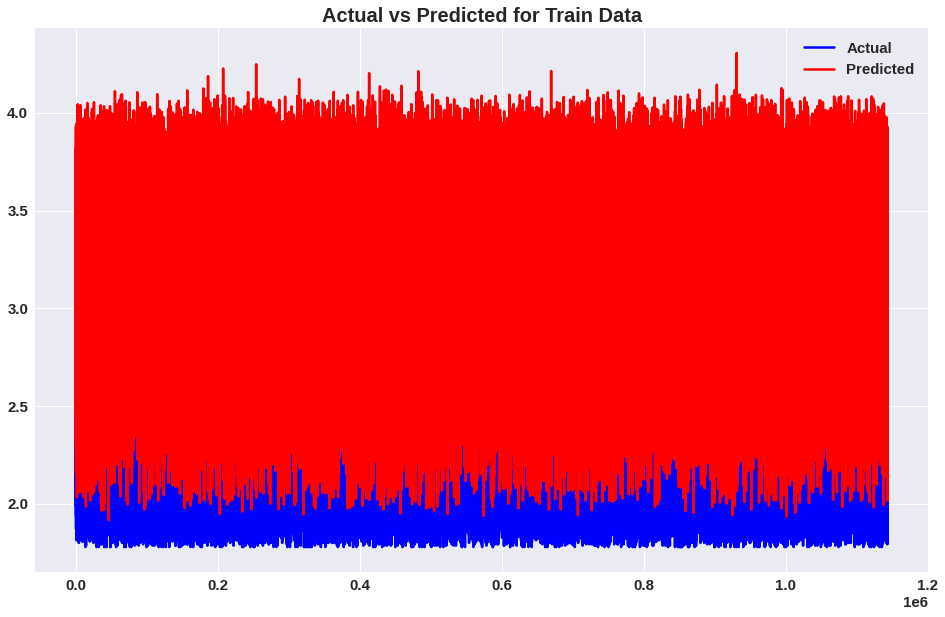

In [204]:
c= [i for i in range(0, len(y_train))]
plt.plot(c, y_train, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_train_lasso, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Train Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

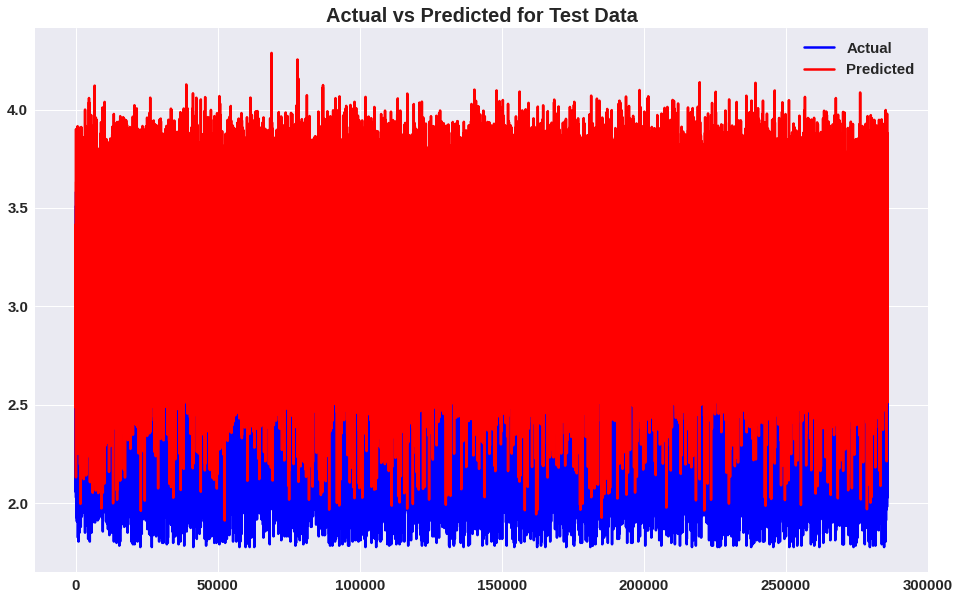

In [205]:
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_test_lasso, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

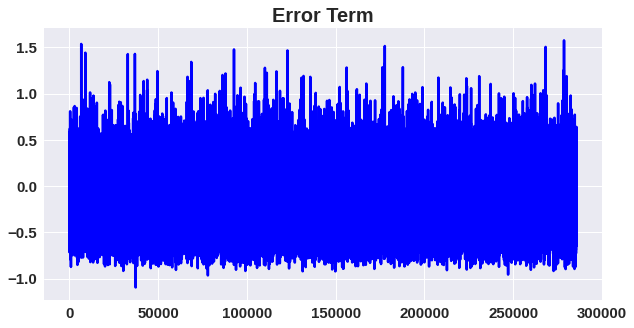

In [206]:
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_test_lasso, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

# **Ridge**

In [207]:
from sklearn.linear_model import Ridge
#Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [208]:
print('The best fit alpha value is found out to be :' ,ridge_regressor.best_params_)
print('The R2 score using the same alpha is :', lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}
The R2 score using the same alpha is : 0.4832016059843959


In [209]:
ridge_regressor.best_estimator_

Ridge(alpha=1)

In [210]:
ridge_regressor.score(X_train, y_train)

0.4832332507223678

In [211]:
y_pred_train_ridge = ridge_regressor.predict(X_train)
y_pred_test_ridge = ridge_regressor.predict(X_test)
# for train data
ridge_train_mse  = mean_squared_error((y_train), (y_pred_train_ridge))
print("Train MSE :" , ridge_train_mse)

ridge_train_rmse = np.sqrt(ridge_train_mse)

print("Train RMSE :" ,ridge_train_rmse)

ridge_train_r2 = r2_score((y_train), (y_pred_train_ridge))
print("Train R2 :" ,lr_train_r2) 

ridge_train_r2_ = 1-(1-r2_score((y_train), (y_pred_train_ridge)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",lr_train_r2_)

ridge_test_mse  = mean_squared_error((y_test), (y_pred_test_ridge))
print("Test MSE :" , ridge_test_mse)

ridge_test_rmse = np.sqrt(ridge_test_mse)

print("Test RMSE :" ,ridge_test_rmse)

ridge_test_r2 = r2_score((y_test), (y_pred_test_ridge))
print("Test R2 :" ,ridge_test_r2)

ridge_test_r2_ = 1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ",lr_test_r2_)

Train MSE : 0.05107120246104399
Train RMSE : 0.22598938572650706
Train R2 : 0.48323325094637404
Train Adjusted R2 :  0.4832228516057119
Test MSE : 0.05087670019130651
Test RMSE : 0.22555864024972866
Test R2 : 0.4820015596900672
Test Adjusted R2 :  0.4819598329316619


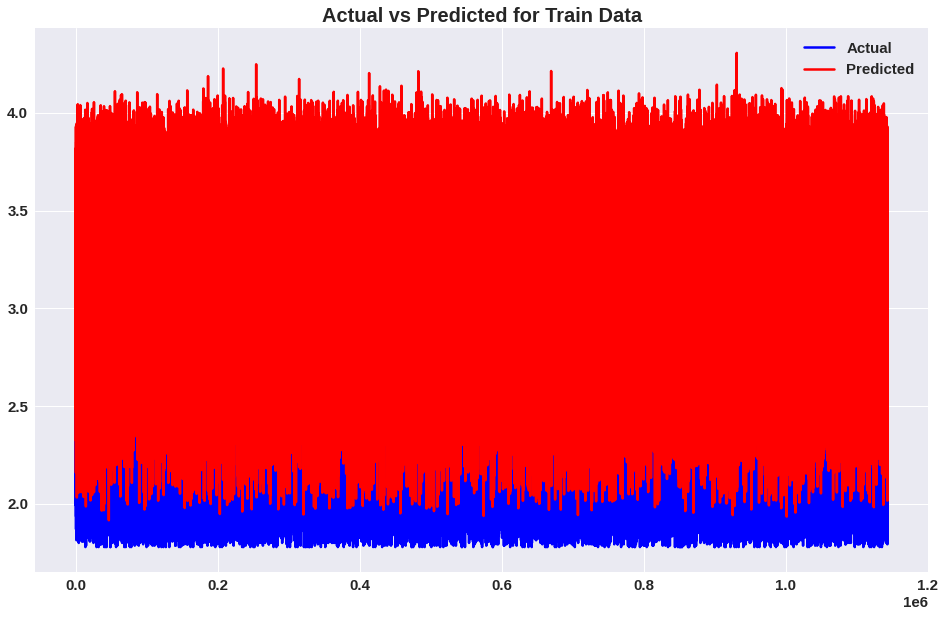

In [212]:
c= [i for i in range(0, len(y_train))]
plt.plot(c, y_train, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_train_ridge, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Train Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

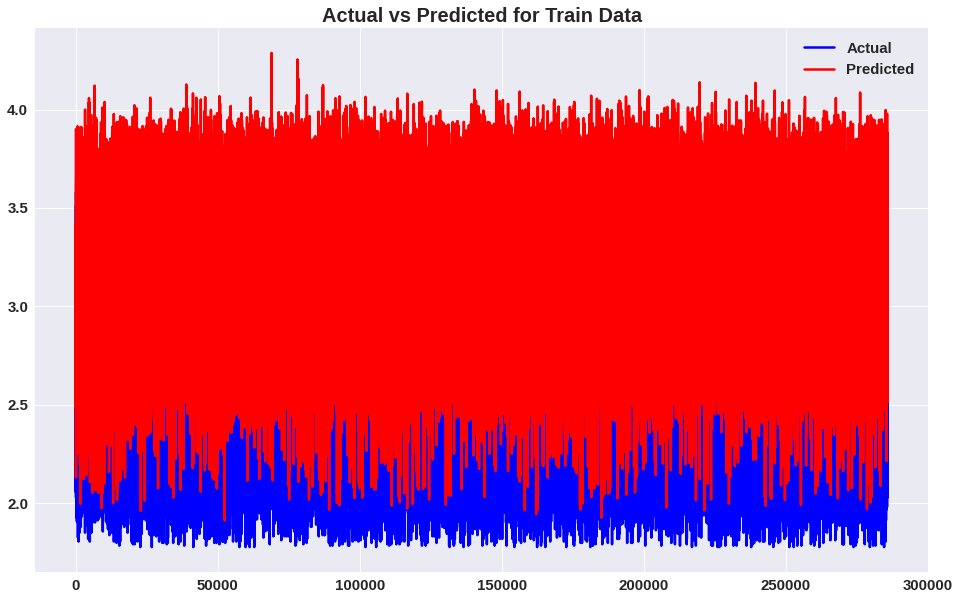

In [213]:
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_test_ridge, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Train Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

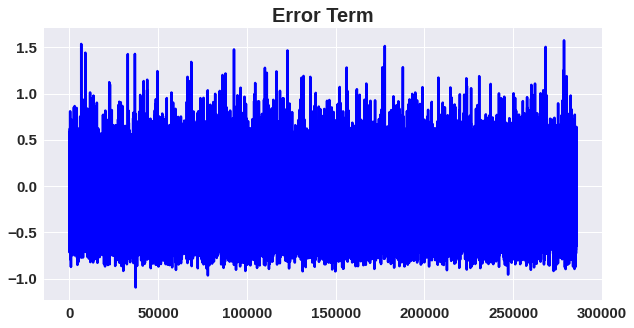

In [214]:
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_test_ridge, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

# **DecisionTree**

In [215]:
from sklearn.tree import DecisionTreeRegressor

In [216]:
# Maximum depth of trees
max_depth = [4,6,8,10]
 
# Minimum number of samples required to split a node
min_samples_split = [10,20,30]
 
# Minimum number of samples required at each leaf node
min_samples_leaf = [8,16,22]
 
# Hyperparameter Grid
param_dict_dt = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
#the cache variables contains the best parameters for the Decision Tree that we already tested before to save time when running again
cache = {
              'max_depth' : [10],
              'min_samples_split' : [10],
              'min_samples_leaf' : [22]}

In [217]:
dtree = DecisionTreeRegressor()
dtree_regr = GridSearchCV(dtree,param_dict_dt, scoring='r2', cv=5)

In [218]:
dtree_regr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [8, 16, 22],
                         'min_samples_split': [10, 20, 30]},
             scoring='r2')

In [220]:
print('The best fit alpha value is found out to be :', dtree_regr.best_params_)
print('The R2 score using the same alpha is :', dtree_regr.best_score_)

The best fit alpha value is found out to be : {'max_depth': 10, 'min_samples_leaf': 22, 'min_samples_split': 20}
The R2 score using the same alpha is : 0.7162481668903886


In [232]:
y_pred_train_dt = dtree_regr.predict(X_train)
y_pred_test_dt = dtree_regr.predict(X_test)

In [234]:
# for train data
dt_train_mse  = mean_squared_error((y_train), (y_pred_train_dt))
print("Train MSE :" , dt_train_mse)

dt_train_rmse = np.sqrt(dt_train_mse)

print("Train RMSE :" ,dt_train_rmse)

dt_train_r2 = r2_score((y_train), (y_pred_train_dt))
print("Train R2 :" ,dt_train_r2) 

dt_train_r2_ = 1-(1-r2_score((y_train), (y_pred_train_dt)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",dt_train_r2_)

Train MSE : 0.02763157853276385
Train RMSE : 0.16622749030399228
Train R2 : 0.7204083646419378
Train Adjusted R2 :  0.7204027381795779


In [235]:
dt_test_mse  = mean_squared_error((y_test), (y_pred_test_dt))
print("Test MSE :" , dt_test_mse)

dt_test_rmse = np.sqrt(dt_test_mse)

print("Test RMSE :" ,dt_test_rmse)

dt_test_r2 = r2_score((y_test), (y_pred_test_dt))
print("Test R2 :" ,dt_test_r2)

dt_test_r2_ = 1-(1-r2_score((y_test), (y_pred_test_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ",dt_test_r2_)

Test MSE : 0.02793631617076685
Test RMSE : 0.16714160514595655
Test R2 : 0.7155678699670248
Test Adjusted R2 :  0.7155449730775212


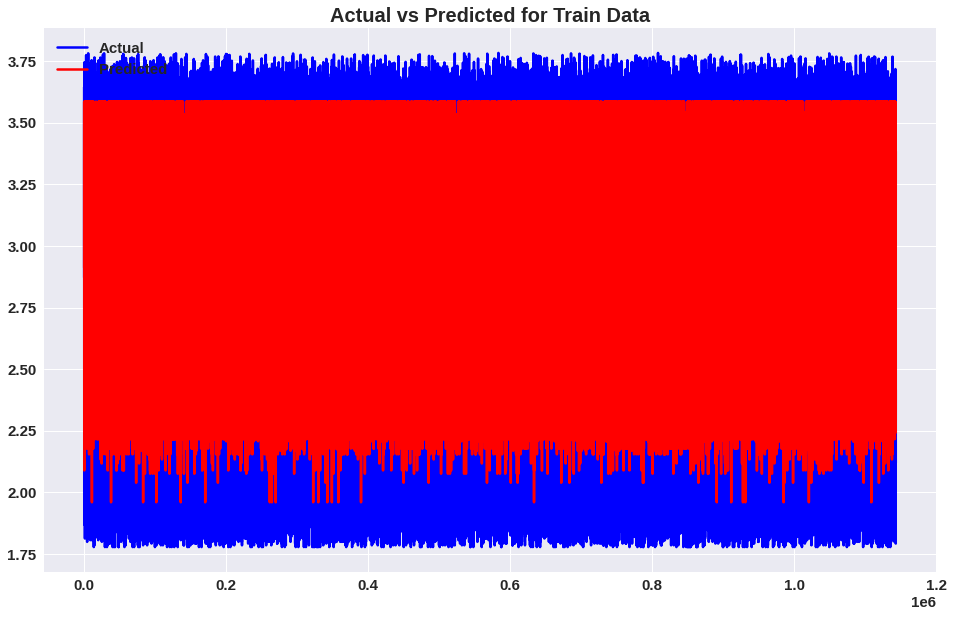

In [229]:
c= [i for i in range(0, len(y_train))]
plt.plot(c, y_train, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_train_dt, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Train Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

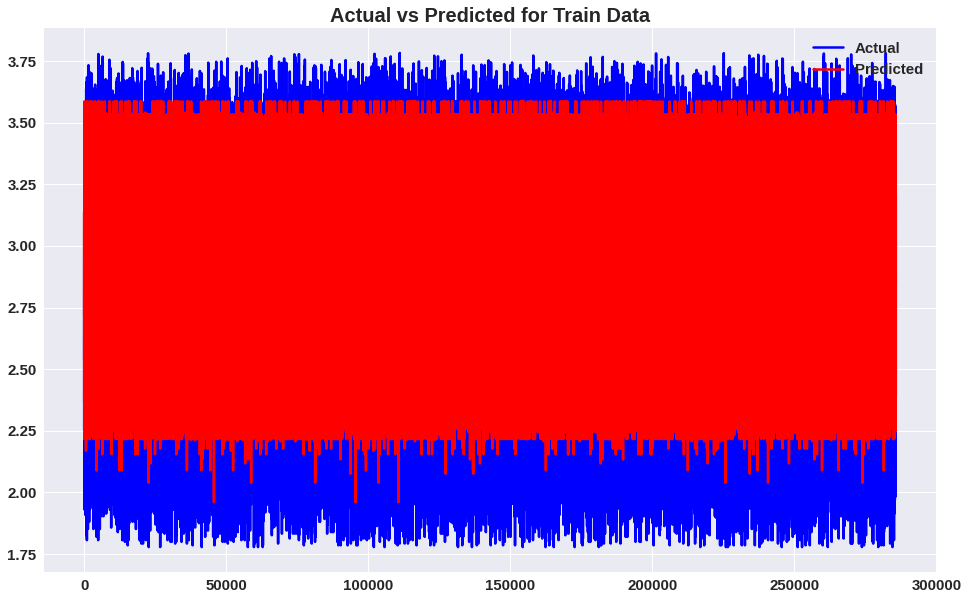

In [230]:
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_test_dt, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Train Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

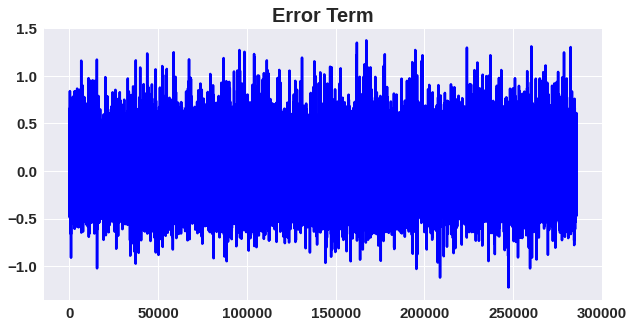

In [236]:
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_test_dt, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()